In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [305]:
# Import data
df = pd.read_csv('sample_data/medical_examination.csv')
df.head(5)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [306]:
# Checking for NULLS 
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [307]:
#checking data types of the dataset
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [308]:
# Add an 'overweight' column to the data. To determine if a person is overweight,
# first calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
# If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

df['overweight'] = np.where( (df['weight']/((df['height'] / 100)**2)) > 25 , 1 ,0) 


In [309]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [310]:
# Normalize data by making 0 always good and 1 always bad.
# If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

print(f'Gluc values before:' , df['gluc'].unique())
print(f'Cholesterol values before:' , df['gluc'].unique())


c_conditions = [(df['cholesterol'] == 1),(df['cholesterol'] > 1)]
g_conditions = [(df['gluc'] == 1),(df['gluc'] > 1)]
choices = [ 0,1 ]

df['cholesterol'] = np.select(c_conditions, choices, default=0)
df['gluc'] = np.select(g_conditions, choices, default=0)



Gluc values before: [1 2 3]
Cholesterol values before: [1 2 3]


In [311]:
print(f'Gluc values after:' , df['gluc'].unique())
print(f'Cholesterol values after:' , df['cholesterol'].unique())
df.head(4)

Gluc values after: [0 1]
Cholesterol values after: [0 1]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1


In [312]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

melted_df = df.melt(id_vars= 'cardio',value_vars=['cholesterol' 	,'gluc' ,	'smoke' ,	'alco' ,	'active' , 	'overweight'])


In [313]:
# Grouping the data by cardio, variable, value ,then calling count agg on the value field.
# then converting the result to a DataFrame.
melted_df = pd.DataFrame(melted_df.groupby(['cardio' ,	'variable' ,	'value'])['value'].count())
melted_df.head(5)


value
cardio variable    value       
0      active      0       6378
                   1      28643
       alco        0      33080
                   1       1941
       cholesterol 0      29330

In [314]:
#renaming the value col to total
melted_df.rename(columns={'value':'total'},inplace=True)

In [315]:
melted_df.reset_index(inplace=True)
melted_df.head(5)


,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


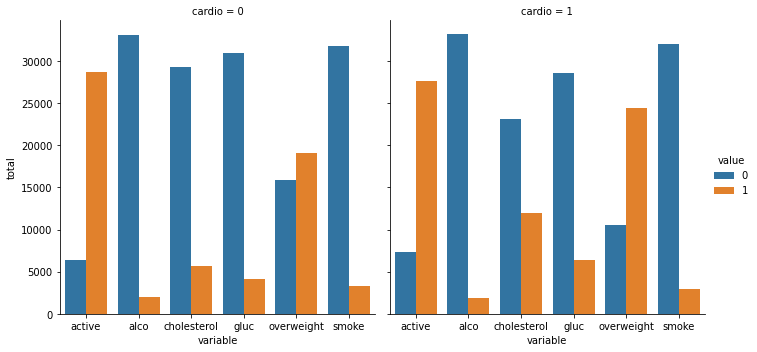

In [316]:
graph = sns.catplot(x='variable',y='total',hue='value',col='cardio',data=melted_df,kind='bar')

graph.savefig('catplot.png')

In [317]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


# Cleaning the Data
According to given conditions 

```
diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less then the 2.5th percentile
weight is more than the 97.5th percentile
```






In [319]:
# Creating new DF according to above criteria
finalDF = df[(df['ap_lo'] <= df['ap_hi'])&
             (df['height'] >= df['height'].quantile(0.025))&
             (df['height'] <= df['height'].quantile(0.975))&
             (df['weight'] >= df['weight'].quantile(0.025))&
             (df['weight'] <= df['weight'].quantile(0.975))
            ]

finalDF.shape

(63259, 14)

In [321]:
# Creating Coor Matrix
corrMatrix = df_heat.corr()
print(corrMatrix)

                   id       age    gender  ...    active    cardio  overweight
id           1.000000  0.002507  0.003426  ...  0.005891  0.003900   -0.000679
age          0.002507  1.000000 -0.018132  ... -0.011445  0.240241    0.089573
gender       0.003426 -0.018132  1.000000  ...  0.007864  0.002320   -0.052930
height       0.000326 -0.076932  0.505785  ... -0.005661 -0.024102   -0.149570
weight       0.000149  0.070168  0.129979  ... -0.014430  0.170042    0.655926
ap_hi        0.003492  0.018689  0.005063  ... -0.000222  0.050556    0.017327
ap_lo        0.000484  0.153508  0.059947  ...  0.001569  0.327181    0.172212
cholesterol  0.003719  0.129996 -0.037605  ...  0.002494  0.203467    0.127986
gluc         0.002289  0.086990 -0.021357  ... -0.010145  0.088445    0.088109
smoke       -0.002732 -0.044371  0.337436  ...  0.026940 -0.020345   -0.003274
alco        -0.000708 -0.026970  0.168637  ...  0.025847 -0.011088    0.025056
active       0.005891 -0.011445  0.007864  ...  1.00

In [323]:
# Creating  a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


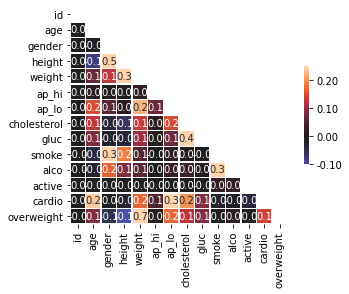

In [325]:
heatMap = sns.heatmap(
        corr,
        linewidths=.5,
        annot=True,
        fmt='.1f',
        mask=mask,
        square=True,
        center=0,
        vmin=-0.1,
        vmax=0.25,
        cbar_kws={
            'shrink': .45,
            'format': '%.2f'
        })


